In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

from utils.table_tools import read_gt_table

%matplotlib inline

In [2]:
rgb_colors, _ = read_gt_table('gt_colors.csv', True)

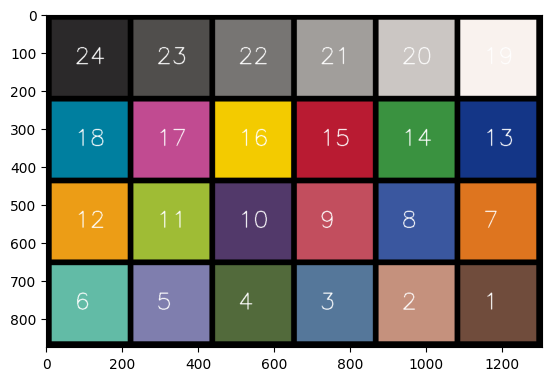

[23, 17, 11, 5, 22, 16, 10, 4, 21, 15, 9, 3, 20, 14, 8, 2, 19, 13, 7, 1, 18, 12, 6, 0]


In [3]:
tab_size = (6, 4)
cell_size = 200
space_size = 15

w = tab_size[0] * (cell_size + space_size) + space_size
h = tab_size[1] * (cell_size + space_size) + space_size

res_table = np.zeros((h, w, 3), dtype=np.uint8)

colors_linear = []


font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2
thickness = 2
lineType = 2


for i in range(tab_size[0]):
    for j in range(tab_size[1]):
        cell_x = i * cell_size + (i + 1) * space_size
        cell_y = j * cell_size + (j + 1) * space_size
        
        color = (tab_size[1] - j - 1) * tab_size[0] + tab_size[1] - i + 1
        colors_linear.append(color)
        
        res_table[cell_y:cell_y+cell_size, cell_x:cell_x+cell_size] = rgb_colors[color]
        
        cv2.putText(
            res_table,
            str(color + 1), 
            (cell_x + cell_size // 2 - 40, cell_y + cell_size // 2  + 15), 
            font, 
            fontScale,
            (255, 255, 255),
            thickness,
            lineType
        )
        
assert cv2.imwrite('data/table_scheme.png', cv2.cvtColor(res_table, cv2.COLOR_RGB2BGR)), 'Table save'

plt.plot(figsize=(18, 14))
plt.imshow(res_table)
plt.show()

print(colors_linear)